In [259]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

# 1.We review the information. Preparing data for processing format

In [692]:
# Загрузка данных / chunksize=None
df = pd.read_csv('train.csv')

In [693]:
df.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,CreditHistoryYears
0,0x1602,CUS0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,22.0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,NaN
2,0x1604,CUS0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,22.0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,22.0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,22.0


In [694]:
#remove empty values
df= df.fillna(0)

In [695]:
df.shape

(100000, 28)

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  object 
 1   CustomerID              100000 non-null  object 
 2   Month                   100000 non-null  object 
 3   Name                    100000 non-null  object 
 4   Age                     100000 non-null  float64
 5   SSN                     100000 non-null  object 
 6   Occupation              100000 non-null  object 
 7   AnnualIncome            100000 non-null  float64
 8   MonthlyInhandSalary     100000 non-null  float64
 9   NumBankAccounts         100000 non-null  int64  
 10  NumCreditCard           100000 non-null  int64  
 11  InterestRate            100000 non-null  int64  
 12  NumofLoan               100000 non-null  float64
 13  TypeofLoan              100000 non-null  object 
 14  Delayfromduedate     

In [697]:
df['CreditScore'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: CreditScore, dtype: int64

In [698]:
df['Name'].value_counts()

0                 9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length: 10140, dtype: int64

In [699]:
df['Occupation'].value_counts()

0               7062
Lawyer          6575
Architect       6355
Engineer        6350
Scientist       6299
Mechanic        6291
Accountant      6271
Developer       6235
MediaManager    6232
Teacher         6215
Entrepreneur    6174
Doctor          6087
Journalist      6085
Manager         5973
Musician        5911
Writer          5885
Name: Occupation, dtype: int64

In [700]:
df['PaymentBehaviour'].value_counts()

LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
0                                7600
Name: PaymentBehaviour, dtype: int64

In [701]:
#сортировка
df.sort_values('MonthlyBalance', ascending = False)

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,CreditHistoryYears
9376,0x4cf2,CUS0x3655,January,Ransdellw,29.0,512-00-8324,Lawyer,177907.720,14712.643330,0,...,Good,685.01,39.432897,No,0.000000,10000.000000,HighspentLargevaluepayments,1.602041e+03,Poor,30.0
7475,0x41cd,CUS0x6479,April,Oranw,33.0,219-01-0237,Accountant,177887.800,14828.983330,4,...,Good,925.47,44.783892,No,0.000000,146.609398,HighspentLargevaluepayments,1.576289e+03,Standard,26.0
33072,0xd7ca,CUS0x26fd,January,Lucianau,32.0,982-46-6532,Scientist,178328.880,14771.740000,4,...,0,708.22,40.541257,No,0.000000,149.965691,HighspentLargevaluepayments,1.567208e+03,Good,16.0
17029,0x79c7,CUS0x9f7a,June,Dave Clarkes,55.0,692-62-0934,Writer,178793.920,14642.493330,1,...,Good,1015.37,49.522324,No,0.000000,137.636169,HighspentLargevaluepayments,1.566613e+03,Good,21.0
15878,0x7308,CUS0xa05d,July,Donny Kwokh,30.0,445-30-2049,Scientist,177546.360,14813.530000,5,...,0,715.97,34.860662,No,50084.000000,157.218174,0,1.564135e+03,Standard,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35570,0xe66c,CUS0x85e9,March,Anna Driveri,45.0,288-62-7562,0,20929.295,1704.107917,5,...,0,858.09,33.943626,No,13798.000000,220.304552,LowspentSmallvaluepayments,-3.330000e+26,Standard,21.0
75251,0x1ceed,CUS0x57f3,April,Kristen Haysq,29.0,577-85-0830,Mechanic,60904.590,0.000000,3,...,Standard,2441.47,29.878716,Yes,61.525140,394.893957,LowspentSmallvaluepayments,-3.330000e+26,Standard,12.0
38622,0xf84c,CUS0x2b77,July,Longstretho,21.0,006-36-0111,Doctor,15167.620,1471.968333,4,...,Good,847.03,28.541848,Yes,9.930809,128.875872,LowspentSmallvaluepayments,-3.330000e+26,Standard,0.0
29158,0xc0d8,CUS0x288d,July,Selamk,55.0,970-19-8342,Lawyer,30748.930,2572.410833,1,...,Good,860.97,40.634250,No,43.727774,79.071807,HighspentSmallvaluepayments,-3.330000e+26,Standard,19.0


# Statistical indicators

In [702]:
# a)  размах вариации
# range of variation
# формула: R = Xmax - Xmin

Xmax = df['AnnualIncome'].max()
Xmin = df['AnnualIncome'].min()
print("Max value is:", Xmax,'\n' "Min value is:",Xmin)
R = Xmax - Xmin
print("range of variation =",R)

Max value is: 24198062.0 
Min value is: 7005.93
range of variation = 24191056.07


In [524]:
# b) среднее по выборке
# sample mean
average  = df['AnnualIncome'].mean()
average
print("sample mean",average)

sample mean 179004.3129170701


In [525]:
#   c)медиану
# median
median = df['AnnualIncome'].median()
print("median = ",median)

median =  37813.29


In [527]:
#d)standartDeviation
standartDeviation=df['AnnualIncome'].std()
print('standartDeviation = ',standartDeviation)

standartDeviation =  1445473.9743730049


In [ ]:
#e) example of sample mean of AnnualIncome for occupation Lawyer
average2 = df[(df['Occupation'] == 'Lawyer')]['AnnualIncome'].mean()
average2
print("sample mean  = ",average2)

In [ ]:
df['Age'].median()

In [ ]:
df['Age'].std()

In [ ]:
# skew  ассиметрия
df['Age'].skew()

In [ ]:
# Коэффициент эксцесса в теории вероятностей — мера остроты пика распределения случайной величины.
# Kurtosis is a measure of the combined weight of a distribution's tails relative to the center of the distribution;
df['Age'].kurt()

# Визуализация
#1. признаки по одному

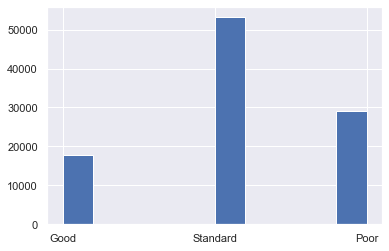

In [275]:
df['CreditScore'].hist();

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'MonthlyInhandSalary'}>,
        <AxesSubplot:title={'center':'NumBankAccounts'}>],
       [<AxesSubplot:title={'center':'NumCreditCard'}>,
        <AxesSubplot:title={'center':'InterestRate'}>,
        <AxesSubplot:title={'center':'NumofLoan'}>,
        <AxesSubplot:title={'center':'Delayfromduedate'}>],
       [<AxesSubplot:title={'center':'NumofDelayedPayment'}>,
        <AxesSubplot:title={'center':'ChangedCreditLimit'}>,
        <AxesSubplot:title={'center':'NumCreditInquiries'}>,
        <AxesSubplot:title={'center':'OutstandingDebt'}>],
       [<AxesSubplot:title={'center':'CreditUtilizationRatio'}>,
        <AxesSubplot:title={'center':'TotalEMIpermonth'}>,
        <AxesSubplot:title={'center':'Amountinvestedmonthly'}>,
        <AxesSubplot:title={'center':'MonthlyBalance'}>],
       [<AxesSubplot:title={'center':'CreditHistoryYears'}>,
     

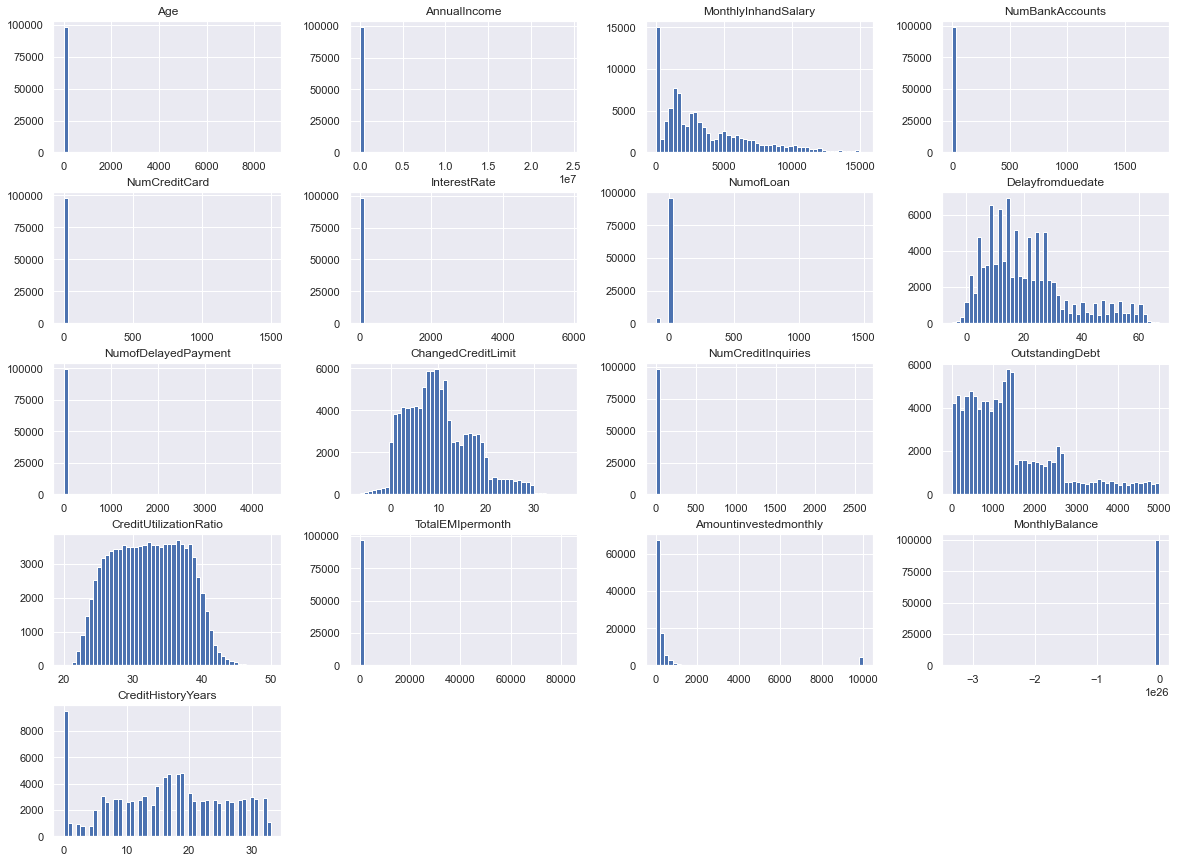

In [276]:
df.hist(bins = 50, figsize = (20,15))

In [277]:
df.CreditHistoryYears.describe()

count    100000.000000
mean         16.344140
std           9.459708
min           0.000000
25%           9.000000
50%          17.000000
75%          24.000000
max          33.000000
Name: CreditHistoryYears, dtype: float64

In [278]:
df['CreditHistoryYears_Range'] = pd.cut(df.CreditHistoryYears , bins = [-1, 9, 17, 24, 33], labels = ['min', 'mid_min', 'mid_max', 'max'], 
                          include_lowest=False)

<AxesSubplot:xlabel='CreditHistoryYears_Range', ylabel='count'>

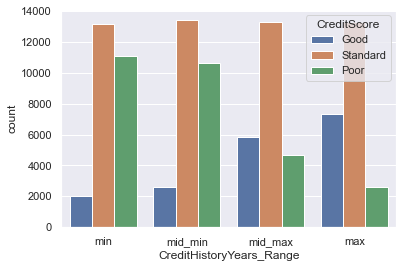

In [279]:
sns.countplot(x = 'CreditHistoryYears_Range', hue = 'CreditScore', data = df)

In [280]:
df.MonthlyBalance.describe()

count    1.000000e+05
mean    -2.997000e+22
std      3.158989e+24
min     -3.330000e+26
25%      2.678714e+02
50%      3.348066e+02
75%      4.676706e+02
max      1.602041e+03
Name: MonthlyBalance, dtype: float64

In [281]:
df['MonthlyBalance_Range'] = pd.cut(df.MonthlyBalance , bins = [-3.330000e+26, 2.678714e+02, 3.348066e+02, 4.676706e+02, 1.602041e+03], labels = ['min', 'mid_min', 'mid_max', 'max'], 
                          include_lowest=False)

<AxesSubplot:xlabel='MonthlyBalance_Range', ylabel='count'>

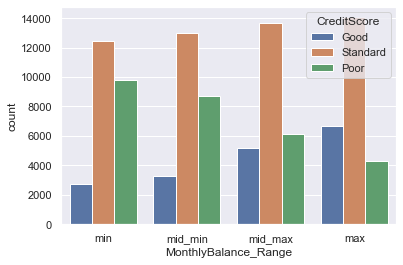

In [282]:
sns.countplot(x = 'MonthlyBalance_Range', hue = 'CreditScore', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

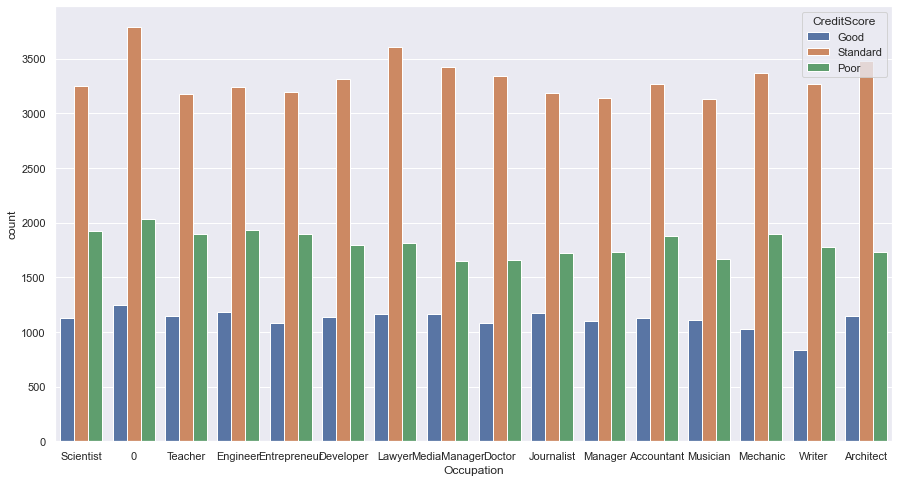

In [283]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x = 'Occupation', hue = 'CreditScore', data = df)


In [284]:
corr_M = df.corr()
corr_M

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,CreditHistoryYears
Age,1.000000,-0.000896,0.002664,0.001943,-0.001772,-0.005500,-0.001149,-0.009526,-0.001865,-0.002133,-0.002136,-0.002092,0.002886,0.000800,0.003412,0.001108,-0.000559
AnnualIncome,-0.000896,1.000000,0.025408,-0.004627,0.001250,-0.002903,0.001486,-0.010631,0.001045,0.000083,0.003159,-0.003706,0.010316,-0.000248,-0.005026,0.000818,-0.001909
MonthlyInhandSalary,0.002664,0.025408,1.000000,-0.010674,-0.005041,-0.004165,-0.005347,-0.202731,0.001439,-0.136940,-0.006778,-0.220670,0.143035,0.006158,0.049397,-0.001031,0.180914
NumBankAccounts,0.001943,-0.004627,-0.010674,1.000000,-0.002216,-0.003994,-0.000735,0.015966,-0.003518,0.007514,-0.001701,0.015548,-0.001365,-0.001433,0.003068,0.001058,-0.008035
NumCreditCard,-0.001772,0.001250,-0.005041,-0.002216,1.000000,-0.004007,0.001350,0.008715,0.004700,0.005915,-0.003528,0.005626,-0.003341,0.000768,-0.002163,0.001268,-0.002127
InterestRate,-0.005500,-0.002903,-0.004165,-0.003994,-0.004007,1.000000,0.000623,0.009805,0.002786,0.000276,-0.001663,0.010681,-0.000299,0.002524,-0.001044,0.001248,-0.007343
NumofLoan,-0.001149,0.001486,-0.005347,-0.000735,0.001350,0.000623,1.000000,0.012690,0.010202,0.014649,-0.000452,0.023929,-0.003949,0.001465,-0.001117,-0.000027,-0.020977
Delayfromduedate,-0.009526,-0.010631,-0.202731,0.015966,0.008715,0.009805,0.012690,1.000000,0.012159,0.284409,0.011415,0.571713,-0.063796,-0.003889,-0.012209,0.004442,-0.394198
NumofDelayedPayment,-0.001865,0.001045,0.001439,-0.003518,0.004700,0.002786,0.010202,0.012159,1.000000,0.006934,0.002505,0.009672,0.001109,0.001145,0.001384,0.000830,-0.007014
ChangedCreditLimit,-0.002133,0.000083,-0.136940,0.007514,0.005915,0.000276,0.014649,0.284409,0.006934,1.000000,0.006064,0.443653,-0.048217,-0.001103,-0.010735,-0.002401,-0.327302


<AxesSubplot:>

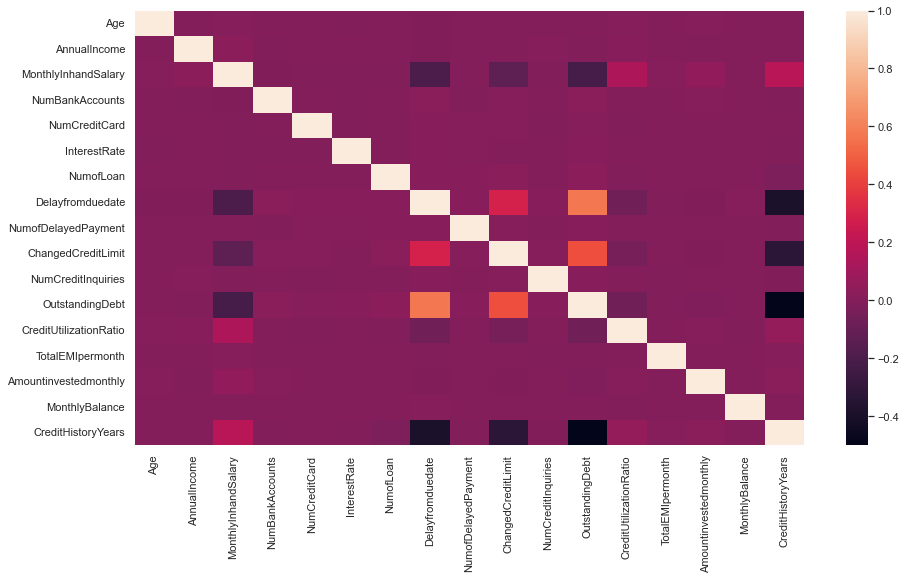

In [285]:
sns.heatmap(df.corr())

#Handling Nulls values

In [286]:
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [287]:
df['CreditScore'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: CreditScore, dtype: int64

In [288]:
df['CreditMix'].value_counts()


Standard    36479
Good        24337
0           20195
Bad         18989
Name: CreditMix, dtype: int64

In [289]:
df['PaymentofMinAmount'].value_counts()

Yes    64333
No     35667
Name: PaymentofMinAmount, dtype: int64

In [703]:
df['Month'] = df['Month'].map({'January':0, 'February':1, 'March':2,'April':3, 'May':4, 'June':5,'July':6, 'Augusth':7})

In [731]:
#df['PaymentBehaviour'] = df['PaymentBehaviour'].map({'LowspentSmallvaluepayments':0, 'HighspentMediumvaluepayments':1, 'LowspentMediumvaluepayments':2,'HighspentLargevaluepayments':3, 'HighspentSmallvaluepayments':4, 'LowspentLargevaluepayments ':5})

In [705]:
df['CreditScore'] = df['CreditScore'].map({'Standard':0, 'Poor':1, 'Good':2})

In [706]:
df['CreditMix'] = df['CreditMix'].map({'Standard':0, 'Good':1, 'Bad':2})

In [707]:
df['PaymentofMinAmount'] = df['PaymentofMinAmount'].map({'Yes':0, 'No':1})

In [708]:
df.head()


,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,CreditHistoryYears
0,0x1602,CUS0xd40,0.0,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,1,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,2,22.0
1,0x1603,CUS0xd40,1.0,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,0.000000,3,...,1.0,809.98,31.944960,1,49.574949,118.280222,LowspentLargevaluepayments,284.629163,2,0.0
2,0x1604,CUS0xd40,2.0,Aaron Maashoh,0.0,821-00-0265,Scientist,19114.12,0.000000,3,...,1.0,809.98,28.609352,1,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,2,22.0
3,0x1605,CUS0xd40,3.0,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,0.000000,3,...,1.0,809.98,31.377862,1,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,2,22.0
4,0x1606,CUS0xd40,4.0,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,1.0,809.98,24.797347,1,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,2,22.0


In [664]:
it = df.groupby(['CreditScore'])[['NumofLoan','Age']].agg([np.std,np.min,np.max])
it

NumofLoan                        Age             
                   std   amin    amax         std amin    amax
CreditScore                                                   
0            63.572078 -100.0  1496.0  679.809653  0.0  8698.0
1            59.428396 -100.0  1485.0  682.099219  0.0  8697.0
2            64.754130 -100.0  1459.0  698.811393  0.0  8655.0

In [297]:
#we can go through average value and save it to excel
NumofLoans = df.groupby('CreditScore')['NumofLoan'].mean()
AnnualIncome = df.groupby('CreditScore')['AnnualIncome'].mean()
AnnualIncome.to_csv('AnnualIncome.csv')
NumofLoans.to_csv('NumofLoans.csv')

In [298]:
AnnualIncome = pd.read_csv('AnnualIncome.csv')
NumofLoans = pd.read_csv('NumofLoans.csv')

In [299]:
NumofLoans

,CreditScore,NumofLoan
0,0,2.982529
1,1,3.894889
2,2,1.848721


In [300]:
AnnualIncome

,CreditScore,AnnualIncome
0,0,185249.156458
1,1,154979.031698
2,2,184936.589810


In [301]:
pd.concat([AnnualIncome,NumofLoans], axis = 0)

,CreditScore,AnnualIncome,NumofLoan
0,0,185249.156458,NaN
1,1,154979.031698,NaN
2,2,184936.589810,NaN
0,0,NaN,2.982529
1,1,NaN,3.894889
2,2,NaN,1.848721


In [302]:
#our CrossTable:(we can see how credit score estimates according to annualIncome and occupation of people)
pd.crosstab([df.CreditScore], df.Occupation, values = df.AnnualIncome, aggfunc = [np.sum])

sum                                            \
Occupation              0    Accountant     Architect     Developer   
CreditScore                                                           
0            6.102205e+08  7.675722e+08  5.870624e+08  5.044027e+08   
1            3.800856e+08  3.412786e+08  2.666538e+08  3.240557e+08   
2            2.524413e+08  1.363875e+08  2.140226e+08  2.233524e+08   

                                                                     \
Occupation         Doctor      Engineer  Entrepreneur    Journalist   
CreditScore                                                           
0            8.026657e+08  5.308767e+08  6.518218e+08  5.793642e+08   
1            1.784188e+08  2.868445e+08  2.514133e+08  1.906541e+08   
2            1.871652e+08  2.864222e+08  2.293916e+08  1.889488e+08   

                                                                     \
Occupation         Lawyer       Manager      Mechanic  MediaManager   
CreditScore                                                           
0            7.093799e+08  4.690010e+08  6.367604e+08  7.775625e+08   
1            3.707894e+08  3.541694e+08  1.981707e+08  2.281506e+08   
2            2.087928e+08  1.278129e+08  2.526769e+08  1.746055e+08   

                                                                     
Occupation       Musician     Scientist       Teacher        Writer  
CreditScore                                                          
0            5.887608e+08  4.830778e+08  5.812762e+08  5.706339e+08  
1            2.838337e+08  3.026418e+08  3.165611e+08  2.203608e+08  
2            2.471921e+08  3.162252e+08  1.157026e+08  1.359098e+08

In [709]:
df = pd.get_dummies(df,columns=['Occupation'])

In [710]:
df.head()

,ID,CustomerID,Month,Name,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0x1602,CUS0xd40,0.0,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,...,0,0,0,0,0,0,0,1,0,0
1,0x1603,CUS0xd40,1.0,Aaron Maashoh,23.0,821-00-0265,19114.12,0.000000,3,4,...,0,0,0,0,0,0,0,1,0,0
2,0x1604,CUS0xd40,2.0,Aaron Maashoh,0.0,821-00-0265,19114.12,0.000000,3,4,...,0,0,0,0,0,0,0,1,0,0
3,0x1605,CUS0xd40,3.0,Aaron Maashoh,23.0,821-00-0265,19114.12,0.000000,3,4,...,0,0,0,0,0,0,0,1,0,0
4,0x1606,CUS0xd40,4.0,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,...,0,0,0,0,0,0,0,1,0,0


In [711]:
df=df.dropna(axis=0)

# Отделение меток

In [712]:
df=df.dropna(axis=0)

In [713]:
X

,Month,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
1,1.0,23.0,19114.12,0.000000,3,4,3,4.0,-1,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,0.0,19114.12,0.000000,3,4,3,4.0,3,7.0,...,0,0,0,0,0,0,0,1,0,0
3,3.0,23.0,19114.12,0.000000,3,4,3,4.0,5,4.0,...,0,0,0,0,0,0,0,1,0,0
4,4.0,23.0,19114.12,1824.843333,3,4,3,4.0,6,0.0,...,0,0,0,0,0,0,0,1,0,0
5,5.0,23.0,19114.12,0.000000,3,4,3,4.0,8,4.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,5.0,28.0,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,0,0,0,0,0,0,0,0,0,0
99990,6.0,28.0,20002.88,1929.906667,10,8,29,5.0,33,26.0,...,0,0,0,0,0,0,0,0,0,0
99993,1.0,25.0,39628.99,3359.415833,4,6,7,2.0,23,0.0,...,0,0,0,0,1,0,0,0,0,0
99997,5.0,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,0,0,0,0,1,0,0,0,0,0


In [734]:
X = df.drop(['CustomerID','ID','Name','CreditScore','TypeofLoan','SSN'], axis = 1)

# Обработка категориальных признаков с помощью OneHotEncoder

In [715]:
h_cat_en, h_categories = X['PaymentBehaviour'].factorize()

In [716]:
h_cat_en

array([0, 1, 2, ..., 1, 5, 0], dtype=int64)

In [717]:
h_categories

Index([  'LowspentLargevaluepayments',  'LowspentMediumvaluepayments',
         'LowspentSmallvaluepayments', 'HighspentMediumvaluepayments',
                                    0,  'HighspentLargevaluepayments',
        'HighspentSmallvaluepayments'],
      dtype='object')

In [718]:
from sklearn.preprocessing import OneHotEncoder

In [719]:
oh = OneHotEncoder()

In [720]:
coded = oh.fit_transform(h_cat_en.reshape(-1,1))

In [721]:
coded

<69916x7 sparse matrix of type '<class 'numpy.float64'>'
	with 69916 stored elements in Compressed Sparse Row format>

In [722]:
proxy = pd.DataFrame(coded.toarray(), index = X.index, columns = ['1','2','3','4','5','6','7'])

In [723]:
X = pd.concat([X, proxy], axis = 1)

In [732]:
X = df.drop(['PaymentBehaviour'], axis = 1)

In [725]:
X = pd.concat([X, proxy], axis = 1)

In [726]:
Y = df['CreditScore']

In [735]:
X

,Month,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
1,1.0,23.0,19114.12,0.000000,3,4,3,4.0,-1,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,0.0,19114.12,0.000000,3,4,3,4.0,3,7.0,...,0,0,0,0,0,0,0,1,0,0
3,3.0,23.0,19114.12,0.000000,3,4,3,4.0,5,4.0,...,0,0,0,0,0,0,0,1,0,0
4,4.0,23.0,19114.12,1824.843333,3,4,3,4.0,6,0.0,...,0,0,0,0,0,0,0,1,0,0
5,5.0,23.0,19114.12,0.000000,3,4,3,4.0,8,4.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,5.0,28.0,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,0,0,0,0,0,0,0,0,0,0
99990,6.0,28.0,20002.88,1929.906667,10,8,29,5.0,33,26.0,...,0,0,0,0,0,0,0,0,0,0
99993,1.0,25.0,39628.99,3359.415833,4,6,7,2.0,23,0.0,...,0,0,0,0,1,0,0,0,0,0
99997,5.0,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,0,0,0,0,1,0,0,0,0,0


# scaling and standardization of values

In [784]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
X = mms.fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

# Создание проверочного набора (Create a validation set)

In [785]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [786]:
X_train.shape, Y_train.shape

((55932, 36), (55932,))

# a. ML With Teacher

# Дерево решений ( decision tree)

In [509]:
from sklearn.tree import DecisionTreeClassifier

In [519]:
tree_cl = DecisionTreeClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=1,random_state=0)
tree_cl.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [520]:
tree_cl.score(X_test,Y_test), tree_cl.score(X_train, Y_train)

(0.7181779176201373, 0.726239004505471)

# Cross - Validation with decision tree

In [741]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [746]:
#передаем наш классификатор обученный, и наше множество,на котором учим.cv - то сколько разбиений мы хотим делать
# scoring='roc_auc'
# we pass our trained classifier, and our set on which we learn. cv - how many partitions we want to do
score = cross_val_score(tree_cl, X_train, Y_train, cv=5) 

In [747]:
# получили 5 оценок из множества X, Y
#received 5 ratings from the set X, Y
score

array([0.7173505 , 0.7164566 , 0.71920257, 0.71544788, 0.71401752])

In [748]:
score.mean()

0.7164950150706683

In [87]:
from sklearn.tree import export_graphviz

In [95]:
export_graphviz (tree_cl, out_file = 'creditscore_tree.dot', max_depth=7, feature_names=None, class_names=None, label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=True, special_characters=False, precision=3)

# param rounded: When set to True, draw node boxes with rounded corners.
# param filled:  When set to True, paint nodes to indicate majority class for classification,
#                extremity of values for regression, or purity of node for multi-output.

In [96]:
!dot -Tpng creditscore_tree.dot -o creditscore_tree.png

# stochastic gradient descent (SGD) learning

Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

In [538]:
from sklearn.linear_model import SGDClassifier
SGDcl = SGDClassifier(max_iter=400,random_state=0)

In [539]:
SGDcl.fit(X_train, Y_train)

SGDClassifier(max_iter=400, random_state=0)

In [540]:
SGDcl.score(X_test,Y_test), SGDcl.score(X_train, Y_train)

(0.6021882151029748, 0.6073625116212544)

In [543]:
pred = SGDcl.predict(X_test)
pred

array([0, 1, 1, ..., 2, 0, 0], dtype=int64)

In [549]:
precision_score(Y_test, pred,average='micro'), recall_score(Y_test, pred,average='micro')
#'micro':Calculate metrics globally by counting the total true positives, false negatives and false positives.

(0.6021882151029748, 0.6021882151029748)

method decision_function:
Predict confidence scores for samples.
The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

In [562]:
Y_score = SGDcl.decision_function(X_train)
pred2 = SGDcl.predict(X_train)

In [563]:
Y_score

array([[ 1.11832621, -1.07857419, -2.09012118],
       [-0.37564575, -2.02205923, -0.45217473],
       [-0.54602071, -1.53067533, -0.28523223],
       ...,
       [-0.53061146, -1.70137674, -0.26474766],
       [ 1.2230597 , -1.1310053 , -1.79025829],
       [ 0.93709439, -1.16075418, -1.66274558]])

In [564]:
Y_score.shape

(55932, 3)

In [565]:
# мы фиксируем максим. и миним.значения у decision_function(X)
# we are fixing max and min value 
ma = Y_score.max() 
mi = Y_score.min()

In [566]:
#Получаем прогноз с помощью сравнения с барьером
#We get a forecast using a comparison with a barrier
predict = Y_score > 0

In [568]:
#precision_score(Y_train, predict), recall_score(Y_train, predict)

In [570]:
#confusion_matrix(Y_train,predict)

# CW 17 and 16 - WHY ? FINISH TOGHETHER WITH MATRIX

# Отбор случайным лесом (Selection by random forest)

In [594]:
from sklearn.ensemble import RandomForestClassifier
randfor_cl = RandomForestClassifier(n_estimators=600, max_depth=6, min_samples_split=2, min_samples_leaf=1, random_state = 0)
randfor_cl.fit(X_train, Y_train)
randfor_cl.feature_importances_


array([6.30454033e-03, 3.61910082e-03, 1.07035174e-02, 6.34245805e-03,
       4.76632064e-02, 6.20341819e-02, 1.51949582e-01, 3.45380669e-02,
       6.85336802e-02, 2.63582274e-02, 3.55735315e-02, 6.68565797e-02,
       1.93176777e-01, 1.77119482e-01, 9.63985400e-04, 5.97853329e-02,
       5.78427752e-03, 1.92399272e-03, 0.00000000e+00, 3.47053985e-02,
       5.31938678e-05, 8.66097481e-05, 8.07794394e-05, 9.59821153e-05,
       1.06206976e-04, 1.02005973e-04, 1.23796346e-04, 1.30148892e-04,
       1.27785370e-04, 9.85734000e-05, 1.34473221e-04, 1.16913760e-04,
       1.14599089e-04, 1.14534299e-04, 1.15107109e-04, 1.62927851e-04,
       3.66588452e-05, 4.75859863e-05, 7.56623832e-04, 1.58106214e-04,
       4.37244488e-05, 3.04207272e-04, 5.05334315e-05, 3.47122398e-05,
       4.68252476e-05, 8.56192476e-04, 1.21601082e-04, 3.66206853e-05,
       3.16518724e-04, 6.97306586e-05, 3.83297352e-05, 6.51767117e-05,
       8.50794517e-04, 1.22535692e-04, 4.32692883e-05, 2.50727185e-04,
      

In [595]:
randfor_cl.score(X_test,Y_test), randfor_cl.score(X_train, Y_train)

(0.665903890160183, 0.6804512622470142)

# Отбор признаков (feature selection)

In [ ]:
#WE SHOULD DO IT BEFORE MINMAX SCALER!

In [609]:
from sklearn.feature_selection import SelectKBest,chi2
#специальные методики,оценивают, какие признаки хорошо влияют на зависимые переменные,какие плохо и т.д.(хи квадрат используем)
#нужно передать количество признаков,которое мы хотим отобрать и критерий по которому будем отбирать(наш хи-квадрат)

Selection using the chi function

In [738]:
#k - количество признаков
Selector = SelectKBest(chi2, k=9)
Selector.fit(X, Y)

SelectKBest(k=9, score_func=<function chi2 at 0x000001E8A3E68B80>)

In [739]:
#покажет признаки,которые он выбирает,что подходит нам и что нет,проверит степень влияния
Selector.get_support()


array([ True, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [740]:
X.columns[Selector.get_support()].tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
drop_cols = X.columns[~Selector.get_support()].tolist()

In [ ]:
drop_cols

In [ ]:
X_train = X.drop(drop_cols, axis = 1)

# CW18

In [606]:
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(X.columns, randfor_cl.feature_importances_)
plt.xticks(rotation=60);columns=df.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 864x864 with 0 Axes>

# Адаптивный бустинг (Adaptive boosting)

In [582]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [586]:
Ada_clf = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth = 7))

In [587]:
Ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7))

In [588]:
Ada_clf.score(X_test,Y_test), Ada_clf.score(X_train, Y_train)

(0.6609696796338673, 0.7761567617821641)

In [589]:
pred = Ada_clf.predict(X_test)

In [590]:
pred

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [591]:
confusion_matrix(Y_test,pred)


array([[5899,  948,  583],
       [1953, 2037,  103],
       [1090,   64, 1307]], dtype=int64)

In [592]:
precision_score(Y_test,pred,pos_label='positive', average='micro'), recall_score(Y_test,pred,pos_label='positive', average='micro'), f1_score(Y_test,pred,pos_label='positive', average='micro') 

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


(0.6609696796338673, 0.6609696796338673, 0.6609696796338673)

# sickit-learn KNN Classifier based on k-nearest neighbors.

#The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [760]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [761]:
# place for dataset X,Y again:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [762]:
sc = StandardScaler()

In [763]:
sc.fit(X_train)

StandardScaler()

In [764]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [765]:
knn_cl.fit(X_train, Y_train) 

KNeighborsClassifier(n_neighbors=3)

In [766]:
knn_cl.score(X_train, Y_train), knn_cl.score(X_test, Y_test)

(0.7927662161195738, 0.618850114416476)

# GridSearchCV 

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters.

In [767]:
from sklearn.model_selection import GridSearchCV

In [779]:
# Поиск гиперпараметров 
# проведем настройку гиперпараметров для дерева и ближайших соседей
#we will adjust the hyperparameters for the tree and nearest neighbors;

tree = DecisionTreeClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=1,random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)

tree.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [780]:
# Оценим точность
#Estimate the accuracy
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [783]:
tree_pred = tree.predict(X_test)
roc_auc_score (Y_test, tree_pred)# accuracy_score (Y_test, tree_pred,multi_class='ovr' )

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
knn_pred = knn.predict(X_test)
roc_auc_score (Y_test, knn_pred), accuracy_score (Y_test, knn_pred)
# accuracy_score - оцениваем точность попадания в класс
# roc_auc_score - оцениваем площать под кривой

In [ ]:
# поиск для дерева
# формируем словарь
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [ ]:
tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose=True)

In [ ]:
tree_grid.fit(X_train, Y_train)

In [ ]:
tree_grid.best_params_

In [ ]:
tree_grid.best_score_

In [ ]:
pred = tree_grid.predict(X_test)

In [ ]:
roc_auc_score(Y_test, pred), accuracy_score(Y_test, pred)

In [ ]:
# поиск для соседей + место для датасета (cw19)

In [ ]:
sc.fit(X_train)
X = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
knn_params= {'n_neighbors':range(1,11)}

In [ ]:
knn_grid = GridSearchCV(knn, knr_params,cv=5, verbose=True)

In [ ]:
knn_grid.fit(X_train,Y_train)

In [ ]:
knn_grid.score(X_train,Y_train)

In [ ]:
pre = knn_grid.predict(X_test)

In [ ]:
roc_auc_score(Y_test, pre), accuracy_score(Y_test, pre)

# Кривые обучения (Learning Curves)

In [796]:
# Передаем какую-то модель и полное наше множество.
# we pass model and our complete set (X,Y).
# Передаем какую-то модель и полное наше множество.
def plot_lc_cl (X, Y, depth):
    X_t, X_v, Y_t, Y_v = train_test_split(X, Y, test_size = 0.2, random_state = 5)
#списки заводим для накопления ошибок (значения метрик accracy) 
    acc_t, acc_v = [], [] 
#    (1, len(X_t)) - это значит мы идем от первого элемента до конца длины нашего множества.
    for m in depth:
        model = DecisionTreeClassifier(max_depth = m)
#        срез это фактически первый элемент и на нем обучаем данные и так по одному идет
        model.fit (X_t, Y_t)
        pred_t = model.predict(X_t)
        pred_v = model.predict(X_v)
        
        acc_t.append(accuracy_score(Y_t, pred_t))
        acc_v.append(accuracy_score(Y_v, pred_v))
    plt.plot(acc_t, 'r--^',label='Training Accuracy')
    plt.plot(acc_v, 'b-o',label='Test Accuracy')
    plt.grid()

Text(0, 0.5, 'Model accuracy')

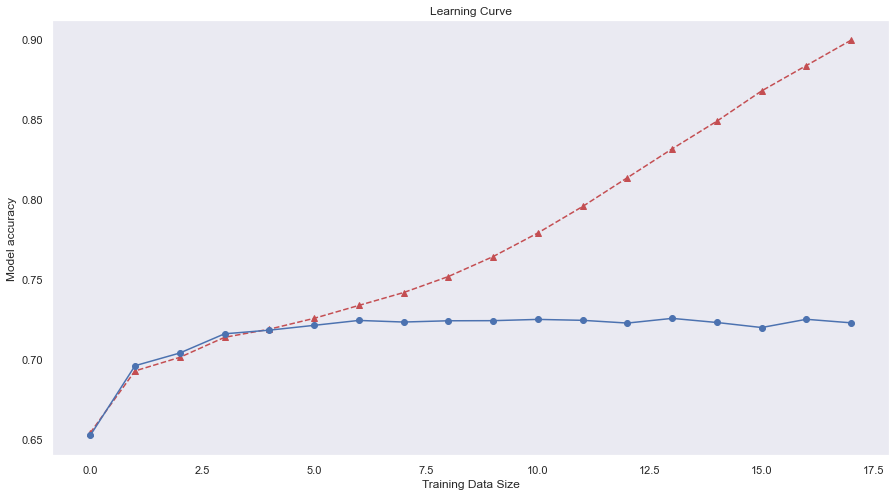

In [797]:
# по оси y откладывается величина точности, по X, количество примеров,по которым учится модель, синяя линия это проверочная ,красная train обучающая
plot_lc_cl(X,Y,np.array(range(2,20,1)))
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')


# Classification with voting

# Hard Voting

In [798]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [799]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Support vector machines (SVMs) 
#are a set of supervised learning methods used for classification, regression and outliers detection.


# Жесткое голосование
#Hard Voting
log_reg = LogisticRegression(random_state = 0)
rnd_clf = RandomForestClassifier(random_state = 0)
svm_clf = SVC(random_state = 0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(X_train, Y_train)

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#формируем кортеж из всех наших классификаторов, потом их перебираем,тренируем их,делаем предсказание на тестовом наборе и печататем
#we form a tuple of all our classifiers , then iterate over them, train them, make a prediction on the test set and print them
for clf in (log_reg, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

In [ ]:
# Мягкое голосование,считаются вероятности и потом складываются. НО: ВАЖНО,регрессоры должны уметь выдавать вероятность
#не все классификаторы умеют это делать.

# Soft voting, probabilities are considered and then added up. BUT: IMPORTANT, regressors must be able to output the probability
# not all classifiers can do this.

log_reg = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, Y_train)

In [ ]:
for clf in (log_reg, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

# Bagging

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=0), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred_tree))

# Automatic parameter searches


RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output.

In [598]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [599]:
#ЗАДАЕМ 20 ПАРАМЕТРОВ 
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 20),
                        'max_depth': randint(5, 10)}

In [601]:
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0),
                             n_iter=5,
                             param_distributions=param_distributions,
                             random_state=0)

search.fit(X_train, Y_train)
search.best_params_

{'max_depth': 9, 'n_estimators': 16}

In [602]:
# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=16 -ABOVE
search.score(X_test, Y_test)

0.6949370709382151